Project Introduction: Our project focuses around how different music affects the mood of different listeners. The data set that we have chosen tracks the mood of listeners for various different songs. It also keeps track of other details and features of the songs, such as length, tempo, key, time signature, and popularity. Our group aims to find which of these key characteristics can best determine whether or not a listener will experience a positive or negative mood in response. With the data we can also see temporal trends, and perhaps see if there are any time periods that caused a change in trend for music mood and how they correlate to the events going on in the world.

The dataset hass the following columns:
- name
- album
- artist
- id
- release date
- popularity
- length
- danceability
- acousticness
- energy
- instrumentalness
- liveness
- valence
- loudness
- speechiness
- tempo
- key
- time signature
- mood

Any changes: After speaking with the professor, we decided to use a publicly available dataset that has much more data points that we are able to study. The link to the dataset can be found here: https://www.kaggle.com/datasets/musicblogger/spotify-music-data-to-identify-the-moods/data

Due to the change in the dataset that we are using, we have slightly altered the domain questions/hypotheses that we are aiming to explore and answer. We are now more focused on how key features of the songs that we are listening can impact the mood, such as key and time signature, rather than something as broad as using a song's genre to dictate these outcomes.

Data Cleaning

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\mahal\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# read in the data file

music_data = pd.read_csv('data_moods.csv')

# now clean data in order to include specific columns, exclude subjective columns such as "danceability"

music_data = music_data[['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'tempo', 'key', 'time_signature', 'mood']]

# now remove any rows with n/a values

music_data = music_data.dropna()

# display the first five entries
music_data.head()

,name,album,artist,id,release_date,popularity,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,169.881,1,4,Energetic


Exploratory Data Analysis

In [3]:
print("The average tempo across all songs: ")
print(music_data['tempo'].mean())
print()
print("Average tempo of happy songs:")
happy_songs = music_data[music_data['mood'] == 'Happy']
print(happy_songs['tempo'].mean())
print()
print("Average popularity of happy songs: ")
print(happy_songs['popularity'].mean())
print()
print("Average tempo of sad songs:")
sad_songs = music_data[music_data['mood'] == 'Sad']
print(sad_songs['tempo'].mean())
print()
print("Average popularity of sad songs: ")
print(sad_songs['popularity'].mean())

The average tempo across all songs: 
119.13467930029152

Average tempo of happy songs:
124.21367857142857

Average popularity of happy songs: 
48.58571428571429

Average tempo of sad songs:
115.5997461928934

Average popularity of sad songs: 
37.73096446700507


Visualization(s)

<AxesSubplot:xlabel='mood', ylabel='popularity'>

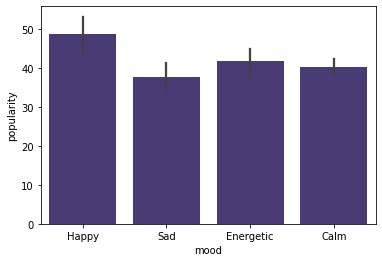

In [4]:
# barchart for moods and popularitty
sns.set_palette('viridis')
sns.barplot(data = music_data, x = 'mood', y='popularity')


In [5]:
#Machine Learning Analysis

In [6]:
#Reflection

Next Steps